# I2ML regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator
from matplotlib.colors import ListedColormap
from math import log

# 1. Regression - Linear Model & Gradient Descent

# 1.1 Basic Idea

Gradient Descent is a first-order iterative optimization algorithm for finding a local minimum of a a differentiable function.

For one sample:<br />
Given feature $X: X_1, X_2, X_3, ..., X_i$ and target Y<br />
We can formulate a regression model: $f(X)=\theta_0+\theta_1*X_1+...+\theta_i*X_i$<br />
Let $X_0 = 1$, $f(X)=\sum\theta_i*X_i$<br />
So, the regression loss is: $L(Y,f(X))=(Y-f(X))^2$<br />
<br />
For n samples:<br />
The regression loss is: $L(Y,f(X))=\frac{1}{n}\sum(Y-f(X))^2$<br />
<br />
Then, our optimization problem becomes: $\hat{\theta}=argminL(Y,f(X))$<br />
We can solve this kind of minimization problem using an iterative technique termed Gradient Descent.<br />
<br />
Gradient descent method:<br />
* step 1: Initialize vector $\theta$: $\theta^0 = 0$ (or randomly), initialize stepsize $\lambda$<br />
* step 2: Evaluate the gradient at current value of the parameter vector $\theta^t$: $\frac{\partial L(Y,f(X))}{\partial \theta}\mid_{\theta=\theta_t}$
* step 3: Update the estimate $\theta$: $\theta_{t+1}=\theta_t-\lambda*\frac{\partial L(Y,f(X))}{\partial \theta}\mid_{\theta=\theta_t}$<br />
* step 4: Go to step 2

Stopping crierion:<br />
* Set maximum iterations number. The iterations stop when reach the maximum iterations number.
* Set $\epsilon$ to check if $\theta$ is not changing notably. The iterations stop when $\mid\mid\theta_{t+1}-\theta_t\mid\mid_2<\epsilon$.

# 1.2 Implementation

In [2]:
# function to perform gradient descent
def gradient_descent(Y,X,stepsize,max_iterations,epsilon):
    Y = Y.tolist()
    X = X.tolist()
    
    n = len(Y)
    m = len(X[0])
    
    # initialize theta
    theta = m * [0]
    
    # record changes of theta 
    theta_storage = (max_iterations+1) * [0]
    theta_storage[0] = theta
    
    # update theta
    for i in range(1,max_iterations+1):
        
        pred = n * [0]
        diff = n * [0]
        for j in range(n):
            for k in range(m):
                pred[j] = pred[j] + theta[k]*X[j][k]
            diff[j] = pred[j] - Y[j]
        
        temp = theta
        theta = m * [0]
        for p in range(m):
            diff_sum = 0
            for q in range(n):
                diff_sum = diff_sum + diff[q]*X[q][p]
            theta[p] = temp[p] - stepsize*diff_sum*2/n
        
        theta_storage[i] = theta
        
        iteration_time = i
        
        # check convergence
        dist = 0
        for l in range(m):
            dist = dist + (theta_storage[i][l] - theta_storage[i-1][l])**2
        
        if pow(dist,0.5) < epsilon:
            break
                       
    # show changes of theta
    iterations = np.arange(0,iteration_time+1,1)
        
    for s in range(m):
        theta_array = np.zeros(iteration_time+1)
        for t in range(iteration_time+1):
            theta_array[t] = theta_storage[t][s]
            
        plt.plot(iterations,theta_array)
        plt.xlabel("iterations")
        plt.ylabel("theta"+str(s))
        plt.show()
                
    return theta       

In [3]:
# function to do prediction using gradient descent
def predict_gradient_descent(X,theta):
    for i in range(len(X)):
        Y = X[i]*theta[i]
    return Y

# 1.3 Example

Use the dataset "salary_year" to show how gradient descent works. This dataset has two column: salary and years of experience. We are going to find the relation between salary and years of experience.

In [4]:
# import dataset
salary_year = pd.read_csv("salary_year.csv")

In [5]:
# show dataset
salary_year

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


Text(0.5, 1.0, 'salary vs years of experience')

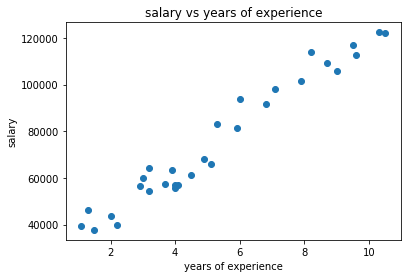

In [6]:
# visulize dataset
salary = np.asarray(salary_year['Salary'])
years = np.asarray(salary_year['YearsExperience'])
plt.scatter(years,salary)
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.title("salary vs years of experience")

In [7]:
# prepocess data
salary_year["X_0"] = 1
year = salary_year.iloc[:,[2,0]]
year = year.values

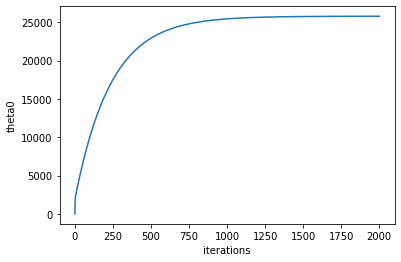

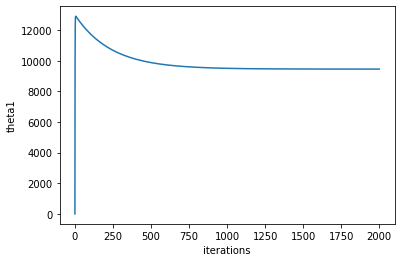

[25787.240971208394, 9450.698250047992]

In [8]:
# apply function gradient_descent
theta_result = gradient_descent(salary,year,0.01,2000,0.0001)
theta_result

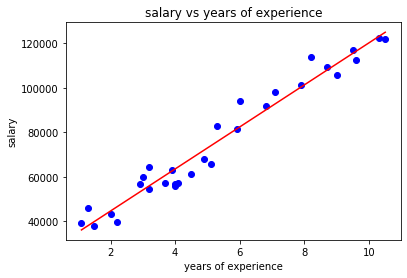

In [9]:
# visulaization
f = np.zeros(len(years))
for i in range(len(years)):
    f[i] = theta_result[0] + theta_result[1]*years[i]
plt.scatter(years,salary,color = "blue")
plt.xlabel("years of experience")
plt.ylabel("salary")
plt.title("salary vs years of experience")
plt.plot(years,f,color = "red")

# 1.4 Quiz

**Question 1** : Consider the training set：<br/>

|x|y|
|-----|-----|
|1|0.5
|2|1|
|4|2|
|0|0|

Consider the linear regression model $h_\theta(x) = \theta_0+\theta_1x$. What are the values of $\theta_0$ and $\theta_1$ that you would expect to obtain upon running gradient descent on this model? (Linear regression will be able to fit this data perfectly.)

A.$\theta_0 = 0.5$,$\theta_1 = 0$<br/>
B.$\theta_0 = 0.5$,$\theta_1 = 0.5$<br/>
C.$\theta_0 = 1$,$\theta_1 = 0.5$<br/>
D.$\theta_0 = 0$,$\theta_1 = 0.5$<br/>

Answer:D

**Question 2** : Based on the traning set in question 1, suppose we set $\theta_0 = -1$, $\theta_1 = 0.5$. What is $h_\theta(4)$?<br />

A.1<br />
B.2<br />
C.3<br />
D.4<br />
<br />
Answer:A

**Question 3** : We can get multiple local optimum solutions if we solve a linear regression problem by
minimizing the sum of squared errors using gradient descent.<br />

A.TRUE<br />
B.FALSE<br />

Answer:B 

**Question 4** : Gradient Descent can only be used for Regression Problems.<br />

A.TRUE<br />
B.FALSE<br />

Answer:B 

# 2. Regression - KNN

# 2.1 Basic Idea

K Nearest Neighbors(KNN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:
* In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.
* In k-NN regression, the output is the property value for the object. This value is the average of the values of k nearest neighbors.<br />

Most common distance measures:
* Euclidean distance: $d(a,b)=\sqrt{(a_1-b_1)^2+...+(a_i-b_i)^2}$
* Manhattan distance: $d(a,b)=\mid a_1-b_1\mid+...+\mid a_i-b_i\mid$

Given train set(X_train, Y_train) and test set(X_test,Y_test):<br />
KNN method:<br />
* step 1: Set parameter k<br />
(for each data in test set, follow step 2 to 4)
* step 2: Calculate euclidean distance (or manhattan distance) between X_train and X_test.
* step 3: Sort distances from small to large
* step 4: Choose the first k distances and their corresponding train data
* step 5: 
    * In KNN regression: Calculate the average of chosen k Y_train. The average is the regression value for X_test
    * In KNN classification: Count the number of each class in chosen k Y_train. The class with the largest number is the class for X_test


# 2.2 Implementation

In [10]:
# function to calculate euclidean distance
def euclidean_distance(a,b):
    e_dist = 0
    for i in range(len(a)):
        e_dist = e_dist + (a[i] - b[i])**2
    return pow(e_dist,0.5)

In [11]:
# function to calculate manhattan distance
def manhattan_distance(a,b):
    m_dist = 0
    for i in range(len(a)):
        m_dist = m_dist + abs(a[i]-b[i])
    return m_dist

In [12]:
# funciton to perform KNN regression
def knn_regression(Y_train,X_train,X_test,k):
    m = len(X_train)
    n = len(X_test)
    Y_pred = np.zeros(n)
    
    for i in range(n):
        
        # calculate euclidean distance between each X_train and the ith X_test
        dist = np.zeros(m)
        for j in range(m):
            dist[j] = euclidean_distance(X_train[j],X_test[i])
        dist_sort = dist.argsort()
        
        # choose k nearest train data and calculte average target values
        target_value = 0
        for l in range(k):
            target_value = target_value + Y_train[dist_sort[l]]
        
        Y_pred[i] = target_value/k
               
    return Y_pred

In [14]:
# funciton to perform KNN classification
def knn_classification(Y_train,X_train,X_test,k):
    m = len(X_train)
    n = len(X_test)
    Y_pred = np.zeros(n)
    
    for i in range(n):
        
        # calculate euclidean distance between each X_train and the ith X_test
        dist = np.zeros(m)
        for j in range(m):
            dist[j] = euclidean_distance(X_train[j],X_test[i])
        dist_sort = dist.argsort()
        
        # choose k nearest train data and count the number of classes
        count = {}
        for l in range(k):
            vote = Y_train[dist_sort[l]]
            count[vote] = count.get(vote,0) + 1
            
        # sort the number of classes
        count_sort = sorted(count.items(),key = operator.itemgetter(1),reverse = True)
        
        Y_pred[i] = count_sort[0][0]
        
        Y_pred = Y_pred.astype(np.int64)
        
               
    return Y_pred

In [15]:
# function to calculate correct rate
def correct_knn(Y_test,Y_pred):
    total = len(Y_test)
    correct = 0
    for i in range(total):
        if Y_test[i] == Y_pred[i]:
            correct = correct + 1
    return correct/total

# 2.3 Example

In [16]:
# import iris dataset
from sklearn.datasets import load_iris
data = load_iris()

In [17]:
# show iris dataset
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [18]:
# divide iris dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.2, random_state = 0)

In [19]:
# apply function knn and calculate correct rate
knn_classification(Y_train,X_train,X_test,k=5)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [20]:
# apply function correct_rate to calculate correct rate
Y_pred = knn_classification(Y_train,X_train,X_test,k=5)
correct_knn(Y_test,Y_pred)

0.9666666666666667

# 2.4 Quiz

**Question 1** : KNN algorithm does more computation on test time rather than train time.<br />

A.TRUE<br />
B.FALSE<br />

Answer: A

**Question 2** : Which of the following distance metric can not be used in KNN?<br />

A.Manhattan distance<br />
B.Euclidean distance<br />
C.Mahalanobis distance<br />
D.All can be used<br />

Answer: D

**Question 3** : Which of the following option is true about KNN algorithm?<br />

A.It can be used for classification<br />
B.It can be used for regression<br />
C.It can be used in both classification and regression<br />
D.It can not be used in both classification and regression<br />

Answer: C

**Question 4** : Which of the following will be Euclidean Distance between the two data point A(1,3) and B(2,3)?<br />

A.1<br />
B.2<br />
C.4<br />
D.8<br />

Answer: A

# 3. Regression - Decision Tree

# 3.1 Basic Idea

Decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences.We can split the dataset based on the values of features to construct a decision tree.

To determine which feature is the best choice to splite data, we have to calculate entropy and information gain.
Entropy represent the complexity of data. Data is more complex when entropy is larger. Formula to Calculate entropy:
$$H=-\sum p(x_i)log_2p(x_i)$$
Information gain represent the difference between two entropy values.

Every time we split the data, we choose the feature with the maximum information gain.

# 3.2 Implementation

In [67]:
# function to calculate entropy
def entropy(dataset):
    
    n = len(dataset)
    count_label = {}
    for i in dataset:
        label = i[-1]
        if label not in count_label.keys():
            count_label[label] = 0
        count_label[label] = count_label[label]+1
    
    sum_entropy = 0
    for key in count_label:
        prob = float(count_label[key])/n
        sum_entropy = sum_entropy - prob*log(prob,2)
    
    return sum_entropy

In [75]:
# function to split data
def split(dataset,col,value):
    splited_data = []
    for i in dataset:
        if i[col] == value:
            vector = i[:col]
            vector.extend(i[col+1:])
            splited_data.append(vector)
    return splited_data

In [79]:
# function to choose best split way
def best_split(dataset):
    num_label = len(dataset[0])-1
    initial_entropy = entropy(dataset)
    best_info_gain = 0
    best_label_index = -1
    for i in range(num_label):
        featlist = [j[i] for j in dataset]
        unique = set(featlist)
        new_entropy = 0
        for value in unique:
            subdataset = split(dataset,i,value)
            prob = len(subdataset)/float(len(dataset))
            new_entropy = new_entropy+prob*entropy(subdataset)
        info_gain = initial_entropy - new_entropy
        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_splite_index = i
    return best_splite_index

In [83]:
# function to determine the final class
def max_class(class_list):
    count_class = {}
    for i in class_list:
        if i not in count_class.keys():
            count_class[i] = 0
        count_class[i] = count_class[i]+1
    sort_class = sorted(count_class.items(),key=operator.itemgetter(1),reverse = True)
    return sort_class[0][0]

In [111]:
# function to construct desicion tree
def decision_tree(dataset,label):
    
    class_list = [i[-1] for i in dataset]
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    if len(dataset[0])==1:
        return max_class(class_list)
    
    best_index = best_split(dataset)
    best_label = label[best_index]
    label.append(best_label)
    decision_tree = {best_label:{}}
    del(label[best_index])
    feature = [i[best_index] for i in dataset]
    unique = set(feature)
    
    for value in unique:
        sublabel = label[:]
        new_dataset = split(dataset,best_index,value)
        decision_tree[best_label][value] = decision_tree(new_dataset,sublabel)
    
    return decision_tree

# 3.3 Example

In [128]:
# import dataset
from sklearn.tree import DecisionTreeRegressor
dataset = pd.read_csv('position_salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [129]:
# Use decision tree method to build model
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [130]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
y_pred

array([150000.])

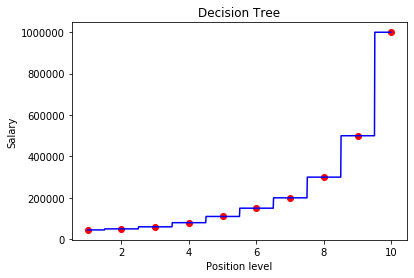

In [131]:
# Visulization
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# 3.4 Quiz

**Question 1** : Decision trees are an algorithm for which machine learning task?<br />

A.clustering<br />
B.classification<br />
C.regression<br />
D.classification and regression<br />

Answer: D

**Question 2** : Decision trees should have at least how many branches?<br />

A.2<br />
B.3<br />
C.4<br />
D.There is no minimum requirement<br />

Answer: D

**Question 3** : What is Decision Tree?<br />

A.Flow-Chart<br />
B.Structure in which internal node represents test on an attribute, each branch represents outcome of test and each leaf node represents class label<br />
C.Flow-Chart & Structure in which internal node represents test on an attribute, each branch represents outcome of test and each leaf node represents class label<br />
D.None of the mentioned<br />

Answer: C

**Question 4** : Which of the following are the advantage/s of Decision Trees?<br />

A.Possible Scenarios can be added<br />
B.Use a white box model, If given result is provided by a model<br />
C.Use a white box model, If given result is provided by a model<br />
D.All of the mentioned<br />

Answer: D